In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import MySQLdb as mdb
import collections 
import jieba
from snownlp import SnowNLP

In [3]:
mysql_cn= mdb.connect(host='localhost', port=3306,user='root', passwd=' ', db='163data',charset='utf8mb4')
df = pd.read_sql('SELECT * FROM 163data.api_comment where song_id=1063472', con=mysql_cn, index_col='id')    
mysql_cn.close()

In [4]:
df.head()

,song_id,content,comment_id,user_id,pub_time,liked_count
id,,,,,,
2860,1063472,格林卡夜曲…希望你不是一道幻影。,10839936,1299992,2015-02-15 21:52:57.370,2
10221,1063472,格林卡《夜曲》（又名别离）,123383432,53298867,2016-02-25 09:57:29.797,299
41479,1063472,"最初看俄罗斯方舟出现了这首,后来看《春天的十七个瞬间》也有这首.....俄罗斯人还真是喜欢格...",132090229,68291148,2016-03-21 13:13:10.388,100
52905,1063472,安静的夜～,135618855,3473870,2016-03-29 23:23:25.708,2
75959,1063472,俄罗斯方舟结尾曲,141437735,64288911,2016-04-13 22:05:53.661,6


In [5]:
total_comments_count = df.shape[0]
print('共有', total_comments_count, '条评论')

共有 575 条评论


In [6]:
total_user_comment = len(df.user_id.unique())
print('共有', total_user_comment, '位用户参与评论')

共有 507 位用户参与评论


In [7]:
most_comment_user_id = df.groupby(by='user_id').size().sort_values(ascending = False).index[0]
most_comment_user_count = df.groupby(by='user_id').size().sort_values(ascending = False)[0]
print('其中',most_comment_user_id,'号用户,发表了最多的', most_comment_user_count,'条评论')

其中 114567785 号用户,发表了最多的 7 条评论


In [8]:
most_liked_comment = df.sort_values(by=['liked_count'], ascending=False).iloc[0,:]
most_liked_comment_user = most_liked_comment.user_id
most_liked_comment_count = most_liked_comment.liked_count
most_liked_comment_content = most_liked_comment.content
print('其中',most_liked_comment_user,'号用户,发表的<font color=red>"',most_liked_comment_content,'"</font>获得最多', most_liked_comment_count,'次点赞')

其中 84984496 号用户,发表的<font color=red>" 日推第一。故作的高姿态，佯装的别离，本质是自卑。 "</font>获得最多 468 次点赞


In [36]:
top_liked_comment = df.sort_values(by=['liked_count'], ascending=False)
top_liked_comment.head()

,song_id,content,comment_id,user_id,pub_time,liked_count
id,,,,,,
92956,1063472,日推第一。故作的高姿态，佯装的别离，本质是自卑。,145872000,84984496,2016-04-25 13:59:06.315,468
697770,1063472,晚上在北大漆黑的音乐厅练完琴要走的时候，一个俄国籍留学生请我帮他用手电照下琴谱，然后就听到了...,339614277,114567785,2017-03-26 14:24:14.465,380
10221,1063472,格林卡《夜曲》（又名别离）,123383432,53298867,2016-02-25 09:57:29.797,299
500004,1063472,晚安，格林卡，晚安，小河马。说到夜曲，相比肖邦舒伯特拉赫玛尼诺夫德彪西etc耳熟能详大师，我...,269061350,310080919,2016-12-20 00:02:06.634,168
273528,1063472,我就是一具躺着空幻想自己能干这个能做那个的尸体。,200283094,253098612,2016-08-16 23:12:24.620,164


In [10]:
with open('stopwords.txt') as fin:
    stopwords = [i.strip() for i in fin.readlines()]
stopwords.append('\n')
stopwords.append(' ')
stopwords.append('\u3000')
print(len(stopwords))

1536


In [11]:
jieba.load_userdict("mydict.txt")

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.974 seconds.
Prefix dict has been built succesfully.


In [12]:
unique_comment_content = df.content.unique()
jieba_comment_content = []
for content in unique_comment_content:
    jieba_comment_content.extend([i for i in jieba.cut(content, cut_all=False) if i not in stopwords])

In [13]:
frency = collections.Counter(jieba_comment_content)
frency.most_common(10)

[('日推', 100),
 ('第一', 56),
 ('听', 36),
 ('曲子', 25),
 ('格林卡', 25),
 ('别离', 25),
 ('喜欢', 25),
 ('想', 19),
 ('大哭', 16),
 ('大笑', 15)]

In [14]:
data = frency.most_common(10)
pp = pd.DataFrame(data,)
pp.head()

,0,1
0,日推,100
1,第一,56
2,听,36
3,曲子,25
4,格林卡,25


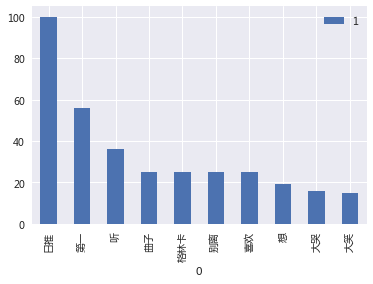

In [15]:
sns.set(font='Microsoft YaHei')
pp.plot(kind='bar', x=0)

In [86]:
feeling_test_length = total_comments_count //5 if total_comments_count <= 10000 else 10000
feeling_comment = top_liked_comment.iloc[0:feeling_test_length,:]
def get_feeling_num(ff):
    return SnowNLP(ff['content']).sentiments*ff.liked_count
feeling_result = feeling_comment.apply(get_feeling_num, axis=1).sum()/feeling_comment.liked_count.sum()
print('评论的综合情感指数:',feeling_result)

评论的综合情感指数: 0.8152838228782779


In [48]:
latest_pub_time = df.pub_time.max()
print('最新一条评论发布于',latest_pub_time)

最新一条评论发布于 2018-02-24 23:03:48.649000


In [49]:
first_pub_time = df.pub_time.min()
print('第一条评论发布于',first_pub_time)

第一条评论发布于 2015-02-15 21:52:57.370000


In [93]:
deta_days = (latest_pub_time-first_pub_time).days
print('共',total_user_comment,'为听众,跨越',deta_days,'天,在song_name下发表了',total_comments_count,'条评论')

共 507 为听众,跨越 1105 天,在song_name下发表了 575 条评论


In [69]:
def get_time_month(ff):
    return ff['pub_time'].strftime('%Y-%m')
def get_time_day(ff):
    return ff['pub_time'].strftime('%Y-%m-%d')
def get_hour(ff):
    return ff['pub_time'].hour
def get_hour_tag(ff):
    if ff.hour > 18:
        return '晚上'
    if ff.hour > 12:
        return '下午'
    if ff.hour > 6:
        return '上午'
    return '午夜'

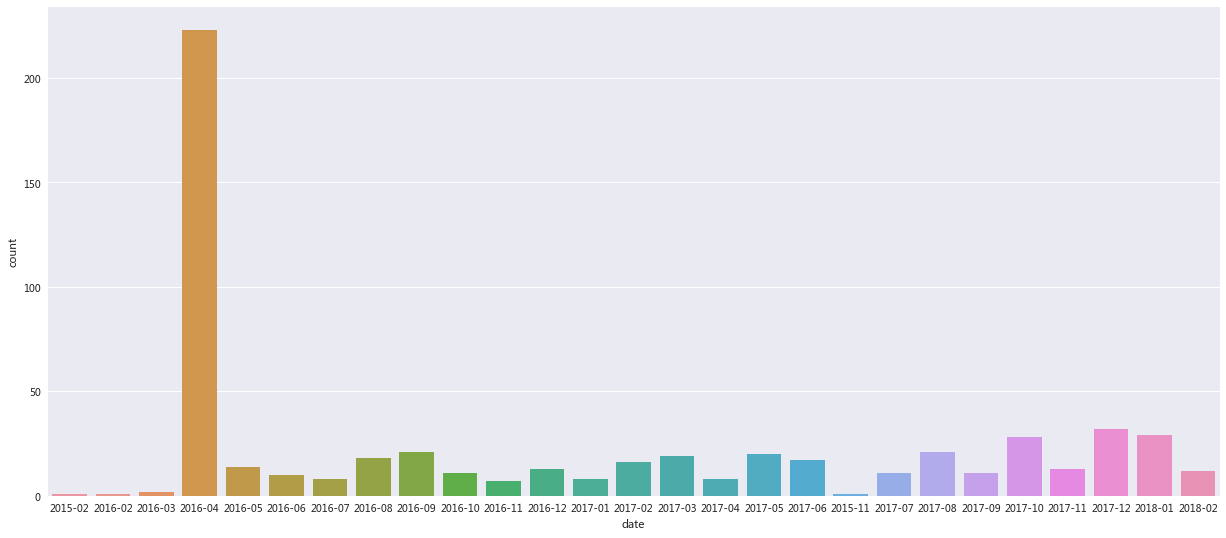

In [64]:
plt.figure(figsize=(21,9))
time_end_with_day = pd.DataFrame(df.apply(get_time_month, axis=1),columns={'date'})
sns.countplot(data=time_end_with_day, x='date')

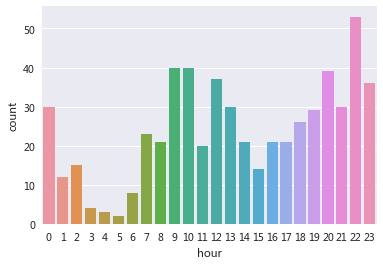

In [79]:
time_get_hour = pd.DataFrame(df.apply(get_hour, axis=1),columns={'hour'})
sns.countplot(data=time_get_hour, x='hour')

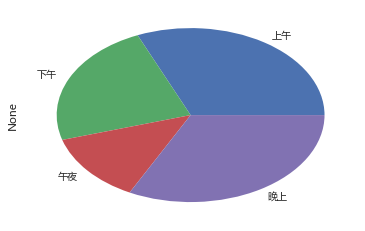

In [85]:
sns.set(font='Microsoft YaHei')
time_get_hour_tag = pd.DataFrame(time_get_hour.apply(get_hour_tag, axis=1),columns={'tag'})
time_get_hour_tag.groupby(by='tag').size().plot(kind='pie')